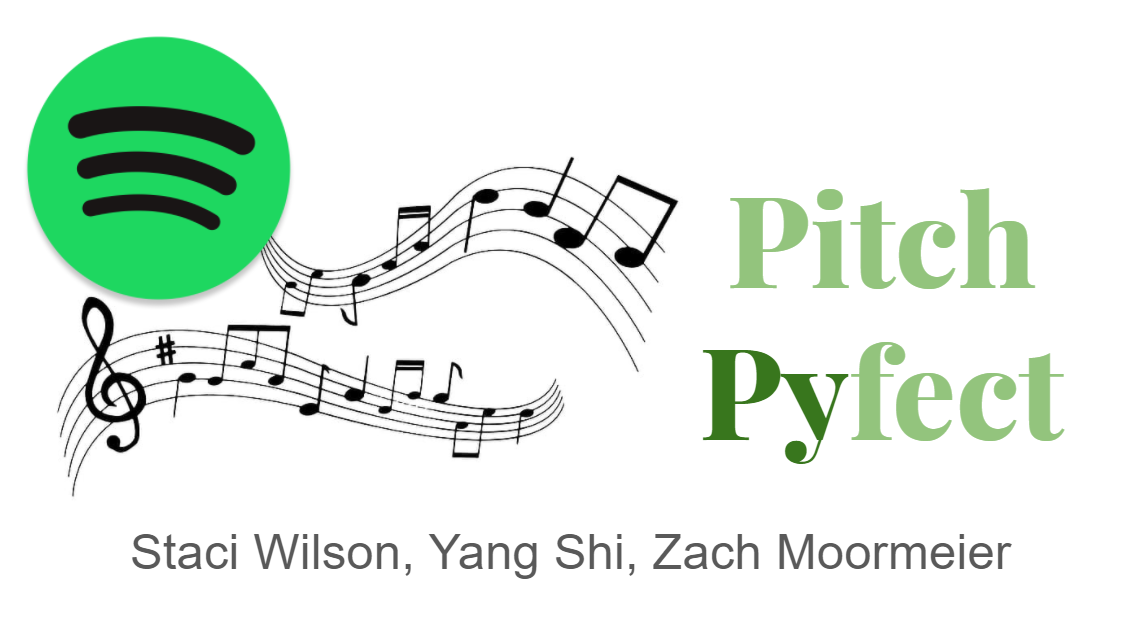

## Dependencies and Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re

genres_6_df=pd.read_csv("Input_Data/artists-data.csv")
lyrics_data_df=pd.read_csv("Input_Data/lyrics-data.csv")
labeled_lyrics_df=pd.read_csv("Input_Data/labeled_lyrics_cleaned.csv")

## 2.0 Music Lyrics Data Cleanup & Exploration

In [2]:
# check for null values in the dataframe
print(genres_6_df.isnull().values.any())
print(lyrics_data_df.isnull().values.any())
print(labeled_lyrics_df.isnull().values.any())

True
True
False


In [3]:
genres_3_df=genres_6_df.loc[(genres_6_df['Genre']=='Rock')|(genres_6_df['Genre']=='Pop')|
                            (genres_6_df['Genre']=='Hip Hop'),['Artist', 'Genre']].copy()
genres_3_df=genres_3_df.dropna()
genres_3_df = genres_3_df.apply(lambda x: x.str.lower() if x.dtype=='object' else x)
genres_3_df

,Artist,Genre
0,10000 maniacs,rock
1,12 stones,rock
2,311,rock
3,4 non blondes,rock
4,a cruz está vazia,rock
...,...,...
3227,tati quebra barraco,hip hop
3228,valesca popozuda,pop
3229,vine rodry,pop
3234,leandro sapucahy,pop


In [4]:
lyrics_data_df = lyrics_data_df.apply(lambda x: x.str.lower() if x.dtype=='object' else x)
labeled_lyrics_df = labeled_lyrics_df.apply(lambda x: x.str.lower() if x.dtype=='object' else x)

labeled_lyrics_df=labeled_lyrics_df.rename(columns={"artist": "Artist", "seq": "Lyric",'song':'SName'})
labeled_lyrics_df=labeled_lyrics_df[['Artist','SName','Lyric']]

alink_list=lyrics_data_df['ALink']
alink_lean_list=[artist[1:-1] for artist in alink_list]
lyrics_data_df['Artist']=alink_lean_list

data_lyrics_df=lyrics_data_df.loc[lyrics_data_df['Idiom']=='english',['Artist','SName','Lyric']]
lyrics_all_df=pd.concat([labeled_lyrics_df,data_lyrics_df])
lyrics_df=pd.merge(lyrics_all_df,genres_3_df, on='Artist',how='outer')
lyrics_df=lyrics_df.dropna()
lyrics_df=lyrics_df.drop_duplicates(subset=['Artist','Genre','SName'])

lyrics_df

,Artist,SName,Lyric,Genre
1647,dead fish,wrong,"when you stay contrite praying for the gods,\r...",rock
4401,cash cash,surrender,i was running on an empty heart\r\nnot a trace...,pop
4402,cash cash,breakout,"let's go, follow me outside\nand i know it won...",pop
4403,cash cash,party in your bedroom,there's a party in your bedroom all night long...,pop
4404,cash cash,two days old,so i'm to blame\r\nthe reason why you left him...,pop
...,...,...,...,...
278569,zendaya,the same heart,"aah, yeah yeah. i see the spotlight in my drea...",pop
278573,zendaya,white christmas,"i'm, dreaming of a white, christmas. just like...",pop
278574,zendaya,whodunit,"ha, a-plus on the track. ha, ha, ha, uh, yeah....",pop
278624,ludmilla,halo,"remember those walls i built?. well, baby, the...",hip hop


## 2.1 Music Lyrics 



In [5]:
rock_lyrics_df=lyrics_df.loc[lyrics_df['Genre'].str.contains('rock'),:]
pop_lyrics_df=lyrics_df.loc[lyrics_df['Genre'].str.contains('pop'),:]
hiphop_lyrics_df=lyrics_df.loc[lyrics_df['Genre'].str.contains('hip hop'),:]

In [6]:
paragraphs=rock_lyrics_df['Lyric']
paragraph_word=[]

for paragraph in paragraphs:
    paragraph_word=paragraph_word+(re.findall(r"[\w']+|[.,!?;]", paragraph))

word_df=pd.DataFrame({'words':paragraph_word})   
word_count_df=pd.DataFrame(word_df.value_counts())
word_count_df.to_csv('Output_Data/rock_word_count.csv')
word_count_df

,0
words,
.,434313
the,218337
",",213733
you,183442
i,179032
...,...
hennessy,1
swimsuit,1
hens,1


In [7]:
paragraphs=pop_lyrics_df['Lyric']
paragraph_word=[]

for paragraph in paragraphs:
    paragraph_word=paragraph_word+(re.findall(r"[\w']+|[.,!?;]", paragraph))

word_df=pd.DataFrame({'words':paragraph_word})   
word_count_df=pd.DataFrame(word_df.value_counts())
word_count_df.to_csv('Output_Data/pop_word_count.csv')
word_count_df

,0
words,
.,362000
",",160869
you,138360
i,128865
the,112297
...,...
luminal,1
luminous,1
lumpy,1


In [8]:
paragraphs=hiphop_lyrics_df['Lyric']
paragraph_word=[]

for paragraph in paragraphs:
    paragraph_word=paragraph_word+(re.findall(r"[\w']+|[.,!?;]", paragraph))

word_df=pd.DataFrame({'words':paragraph_word})   
word_count_df=pd.DataFrame(word_df.value_counts())
word_count_df.to_csv('Output_Data/hiphop_word_count.csv')
word_count_df

,0
words,
.,380461
",",198560
i,124220
the,121983
you,112990
...,...
pore,1
porco,1
porchfloor,1
